In [8]:
import pandas as pd
from glob import glob
import os
from IPython.display import display, HTML
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

pd.set_option('display.max_rows', 10)

In [9]:
#read the csvs
csv_paths = glob(os.path.join('dataset','*.csv'))
csv_paths

['dataset\\age_gender_bkts.csv',
 'dataset\\countries.csv',
 'dataset\\sample_submission_NDF.csv',
 'dataset\\sessions.csv',
 'dataset\\test_users.csv',
 'dataset\\train_users_2.csv']

In [10]:
#remove submission csv
csv_paths = list(filter(lambda x : x != os.path.join('dataset','sample_submission_NDF.csv'),csv_paths))
csv_paths

['dataset\\age_gender_bkts.csv',
 'dataset\\countries.csv',
 'dataset\\sessions.csv',
 'dataset\\test_users.csv',
 'dataset\\train_users_2.csv']

In [11]:
#set filename as key
dfs = {path.split(os.sep)[-1].split(".")[0] : pd.read_csv(path) for path in csv_paths}
dfs.keys()

dict_keys(['age_gender_bkts', 'countries', 'sessions', 'test_users', 'train_users_2'])

In [21]:
dfs['train_users_2']

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213446,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,google,omg,Web,Mac Desktop,Safari,NDF
213447,mhewnxesx9,2014-06-30,20140630235719,NaN,NaN,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,NDF
213448,6o3arsjbb4,2014-06-30,20140630235754,NaN,NaN,32.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,NDF
213449,jh95kwisub,2014-06-30,20140630235822,NaN,NaN,NaN,basic,25,en,other,other,tracked-other,iOS,iPhone,Mobile Safari,NDF


In [12]:
#In all the dataframes there is an -unknown- which is equivalent to nan. We need to replace -unknown- with nan.
for filename,df in dfs.items():
    df.replace('-unknown-', np.nan,inplace=True)

In [14]:
#percentage missing data in all the columns of all the dataframes
for filename,df in dfs.items():
    print(filename)
    missing_percentage = df.isna().mean() * 100
    print(missing_percentage.sort_values(ascending=False))
    print("###########################")

age_gender_bkts
year                       0.0
population_in_thousands    0.0
gender                     0.0
country_destination        0.0
age_bucket                 0.0
dtype: float64
###########################
countries
language_levenshtein_distance    0.0
destination_language             0.0
destination_km2                  0.0
distance_km                      0.0
lng_destination                  0.0
lat_destination                  0.0
country_destination              0.0
dtype: float64
###########################
sessions
action_type      20.414721
action_detail    20.414446
device_type       1.999283
secs_elapsed      1.287229
action            0.753482
user_id           0.326428
dtype: float64
###########################
test_users
date_first_booking         100.000000
gender                      54.418964
age                         46.502190
first_browser               27.583097
first_affiliate_tracked      0.032208
                              ...    
signup_flow          

In [15]:
#Observations
#date_first_booking and age have bulk of missing values in training set

In [16]:
#Outliers
#running descriptive analysis on all columns of all dataframes to check min/max values
for filename,df in dfs.items():
    print(filename)
    display(df.describe())
    print("#####################")

age_gender_bkts


,population_in_thousands,year
count,420.000000,420.0
mean,1743.133333,2015.0
std,2509.843202,0.0
min,0.000000,2015.0
25%,396.500000,2015.0
50%,1090.500000,2015.0
75%,1968.000000,2015.0
max,11601.000000,2015.0


#####################
countries


,lat_destination,lng_destination,distance_km,destination_km2,language_levenshtein_distance
count,10.000000,10.000000,10.000000,1.000000e+01,10.00000
mean,39.799398,-4.262446,7181.897800,2.973734e+06,50.49900
std,24.739112,63.700585,3941.141734,4.329619e+06,44.54169
min,-26.853388,-96.818146,0.000000,4.154300e+04,0.00000
25%,39.639090,-6.737559,7001.557600,2.580425e+05,0.00000
50%,44.053092,-0.139014,7603.632650,4.311960e+05,67.91500
75%,51.891219,9.163386,7842.357000,5.966865e+06,91.39500
max,62.393303,133.275160,15297.744000,9.984670e+06,95.45000


#####################
sessions


,secs_elapsed
count,1.043171e+07
mean,1.940581e+04
std,8.888424e+04
min,0.000000e+00
25%,2.290000e+02
50%,1.147000e+03
75%,8.444000e+03
max,1.799977e+06


#####################
test_users


,timestamp_first_active,date_first_booking,age,signup_flow
count,6.209600e+04,0.0,33220.000000,62096.000000
mean,2.014081e+13,NaN,37.616677,7.813885
std,8.024585e+07,NaN,74.440647,11.254291
min,2.014070e+13,NaN,1.000000,0.000000
25%,2.014072e+13,NaN,26.000000,0.000000
50%,2.014081e+13,NaN,31.000000,0.000000
75%,2.014091e+13,NaN,40.000000,23.000000
max,2.014093e+13,NaN,2002.000000,25.000000


#####################
train_users_2


,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


#####################


In [22]:
#age has outliers
print("Number of entries with age < 18 are {} and Number of entries with age > 120 are {}".
      format(dfs['train_users_2'][dfs['train_users_2']['age'] < 18].shape[0], dfs['train_users_2'][dfs['train_users_2']['age'] > 120].shape[0]))

#Capping the age between 18 to 120
dfs['train_users_2'][dfs['train_users_2']['age'] < 18]['age'] = 18
dfs['train_users_2'][dfs['train_users_2']['age'] > 120]['age'] = 120

Number of entries with age < 18 are 158 and Number of entries with age > 120 are 781


<ipython-input-22-f73b5bc04cdb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['train_users_2'][dfs['train_users_2']['age'] < 18]['age'] = 18
<ipython-input-22-f73b5bc04cdb>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfs['train_users_2'][dfs['train_users_2']['age'] > 120]['age'] = 120


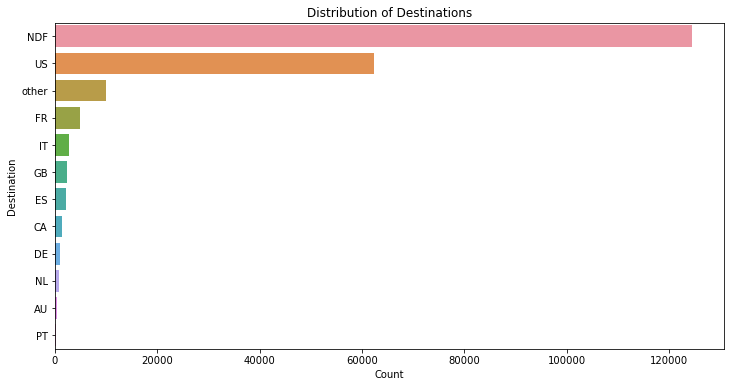

In [23]:
#Let's run some analysis on our training set
#What are the most sought after destinations?
plt.figure(figsize=(12, 6))
sns.countplot(data=dfs['train_users_2'], y='country_destination', order=dfs['train_users_2']['country_destination'].value_counts().index)
plt.title('Distribution of Destinations')
plt.xlabel('Count')
plt.ylabel('Destination')
plt.show()


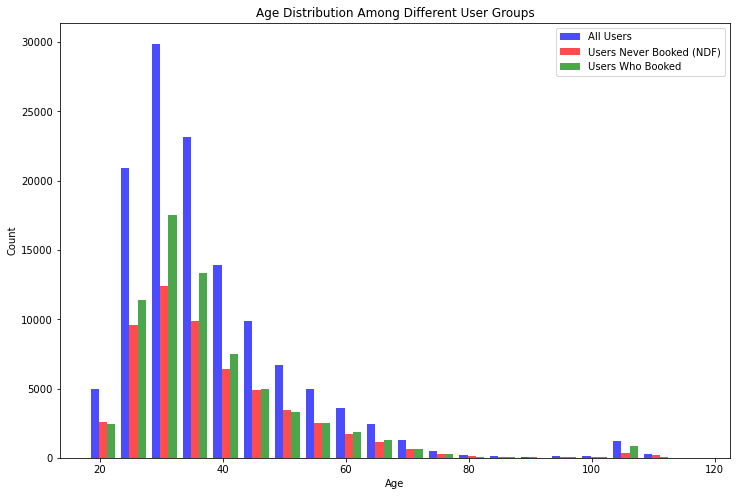

In [24]:
#What is the age distribution of users in training data?
#What is the age distribution of users who never booked?
#What is the age distribution of users who booked?

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = dfs['train_users_2']

# Splitting the data based on booking status
all_users = df['age']
ndf_users = df[df['country_destination'] == 'NDF']['age']
booked_users = df[df['country_destination'] != 'NDF']['age']


plt.figure(figsize=(12, 8))

bin_range = np.arange(18, 120, 5)

# Plot histograms
plt.hist([all_users, ndf_users, booked_users], bins=bin_range, label=['All Users', 'Users Never Booked (NDF)', 'Users Who Booked'],
         color=['blue', 'red', 'green'], alpha=0.7, stacked=False)

plt.title('Age Distribution Among Different User Groups')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend()

plt.show()



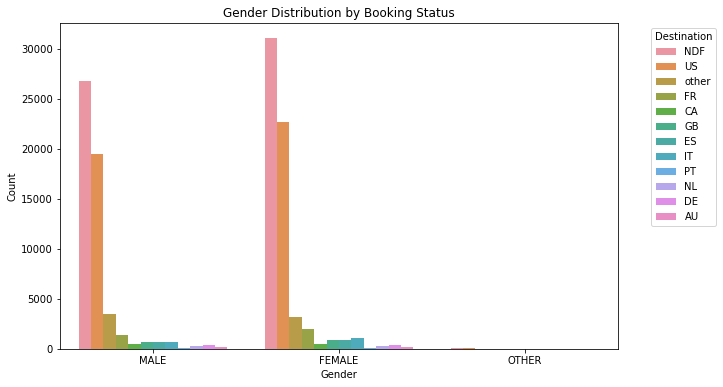

In [25]:
#What is the gender distribution of users across different destinations?
#Does NDF shows a strong trend with any gender?
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='country_destination', data=df)
plt.title('Gender Distribution by Booking Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [118]:
#for sessions data, we'll do the following-
#we'll get list of unique values of each column
#get sum, mean and count of secs_elapsed
#vectorize catagorical columns
#merge with train_users_2

In [27]:
#getting unique value of each user through aggregation
df_sessions = dfs['sessions']
df_unique_sessions=df_sessions.groupby(["user_id"],as_index=False).agg(lambda x :x.tolist())
print(df_unique_sessions.shape)
df_unique_sessions.head()

(135483, 6)


,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,00023iyk9l,"[index, dashboard, header_userpic, dashboard, ...","[view, view, data, view, partner_callback, mes...","[view_search_results, dashboard, header_userpi...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[20438.0, 787.0, 850.0, 934.0, nan, 129817.0, ..."
1,0010k6l0om,"[search_results, show, personalize, show, sear...","[click, view, data, nan, click, click, nan, da...","[view_search_results, p3, wishlist_content_upd...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,..."
2,001wyh0pz8,"[search, search, search, show, social_connecti...","[click, click, click, view, data, nan, view, n...","[view_search_results, view_search_results, vie...","[Android App Unknown Phone/Tablet, Android App...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ..."
3,0028jgx1x1,"[show, reviews, show, search, show, search, re...","[view, data, view, click, view, click, data, s...","[user_profile, listing_reviews, p3, view_searc...","[nan, nan, nan, nan, nan, nan, nan, Android Ph...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0..."
4,002qnbzfs5,"[social_connections, payment_methods, create, ...","[data, nan, nan, view, data, data, data, nan, ...","[user_social_connections, nan, nan, user_profi...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782..."


In [28]:
import re
from statistics import mean

def calculate_total_seconds(time_list):
    """
    Calculate the total time spent by a user on the application, handling missing values.
    
    """
    # Convert all entries to strings, replace 'nan' with '0', convert to float, and sum up
    total_time = sum(float(re.sub('nan', '0', str(time))) for time in time_list)
    return total_time


def calculate_average_seconds(time_list):
    """
    Calculate the average session time spent by a user on the application, handling missing values.

    """
    # Handle cases with all 'nan' to avoid division by zero
    if all(str(time) == 'nan' for time in time_list):
        return 0
    # Process time list to handle 'nan' and calculate mean
    processed_times = [float(re.sub('nan', '0', str(time))) for time in time_list]
    average_time = mean(processed_times)
    return average_time


def count_sessions(time_list):
    """
    Count the number of sessions recorded for a user.

    """
    return len(time_list)

def compute_unique_actions(actions_list):
    """
    Computes a comma-separated string of unique actions taken by a user, ignoring missing values.

    """
    # Filter out 'nan' values, convert to set for uniqueness, then join into a string
    filtered_actions = set(re.sub('nan', '', str(action)) for action in actions_list)
    unique_actions = ','.join(filtered_actions)
    
    return unique_actions

def count_unique_actions(action_list):
    """
    Calculates the number of unique actions for a user.

    """
    # Convert actions to a set to eliminate duplicates and count the unique elements
    unique_actions_count = len(set(action_list))
    return unique_actions_count



In [29]:
#creating features through aggregation
df_unique_sessions["sum_secs_elapsed"]=df_unique_sessions["secs_elapsed"].apply(calculate_total_seconds)
df_unique_sessions["avg_seconds_elapsed"]=df_unique_sessions["secs_elapsed"].apply(calculate_average_seconds)
df_unique_sessions["count_sessions"]=df_unique_sessions["secs_elapsed"].apply(count_sessions)
df_unique_sessions['unique_action'] = df_unique_sessions['action'].apply(compute_unique_actions)
df_unique_sessions['unique_action_type'] = df_unique_sessions['action_type'].apply(compute_unique_actions)
df_unique_sessions['unique_action_detail'] = df_unique_sessions['action_detail'].apply(compute_unique_actions)
df_unique_sessions['unique_device_type'] = df_unique_sessions['device_type'].apply(compute_unique_actions)
df_unique_sessions["number_unique_actions_type"]=df_unique_sessions["action_type"].apply(count_unique_actions)
df_unique_sessions["number_unique_action"]=df_unique_sessions["action"].apply(count_unique_actions)
df_unique_sessions["number_unique_actions_detail"]=df_unique_sessions["action_detail"].apply(count_unique_actions)
df_unique_sessions["number_unique_device_type"]=df_unique_sessions["device_type"].apply(count_unique_actions)

In [30]:
df_unique_sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed,sum_secs_elapsed,avg_seconds_elapsed,count_sessions,unique_action,unique_action_type,unique_action_detail,unique_device_type,number_unique_actions_type,number_unique_action,number_unique_actions_detail,number_unique_device_type
0,00023iyk9l,"[index, dashboard, header_userpic, dashboard, ...","[view, view, data, view, partner_callback, mes...","[view_search_results, dashboard, header_userpi...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[20438.0, 787.0, 850.0, 934.0, nan, 129817.0, ...",867896.0,21697.400000,40,"index,,pending,show,personalize,dashboard,sear...",",booking_request,data,click,partner_callback,m...","oauth_response,pending,,view_search_results,ch...","Mac Desktop,iPhone",7,14,14,2
1,0010k6l0om,"[search_results, show, personalize, show, sear...","[click, view, data, nan, click, click, nan, da...","[view_search_results, p3, wishlist_content_upd...","[Mac Desktop, Mac Desktop, Mac Desktop, Mac De...","[1708.0, 21260.0, 1223.0, 26.0, 847.0, 1230.0,...",586543.0,9310.206349,63,"index,show,personalize,dashboard,search_result...",",click,data,partner_callback,view",",oauth_response,view_search_results,change_tri...",Mac Desktop,5,11,8,1
2,001wyh0pz8,"[search, search, search, show, social_connecti...","[click, click, click, view, data, nan, view, n...","[view_search_results, view_search_results, vie...","[Android App Unknown Phone/Tablet, Android App...","[622.0, 1813.0, 1507.0, 6327.0, 927.0, 142.0, ...",282965.0,3144.055556,90,"index,collections,show,create,search,active,ca...",",click,data,submit,view",",user_profile,update_user,view_search_results,...",Android App Unknown Phone/Tablet,5,10,9,1
3,0028jgx1x1,"[show, reviews, show, search, show, search, re...","[view, data, view, click, view, click, data, s...","[user_profile, listing_reviews, p3, view_searc...","[nan, nan, nan, nan, nan, nan, nan, Android Ph...","[6162.0, 75.0, 86.0, 13710.0, 25217.0, 10989.0...",297010.0,9580.967742,31,"show,create,search,active,reviews",",data,click,submit,view","user_profile,,view_search_results,listing_revi...",",Android Phone",5,5,6,2
4,002qnbzfs5,"[social_connections, payment_methods, create, ...","[data, nan, nan, view, data, data, data, nan, ...","[user_social_connections, nan, nan, user_profi...","[iPhone, iPhone, iPhone, iPhone, iPhone, iPhon...","[17135.0, 711.0, 274.0, 179.0, 483.0, 1.0, 782...",6487080.0,8221.901141,789,",show,create,confirm_email,search,active,updat...",",booking_request,data,click,submit,message_pos...",",update_user,view_search_results,listing_revie...",",iPhone",7,26,22,2


In [31]:
# Merge user and session data
df_train_sessions = dfs['train_users_2'].merge(df_unique_sessions, left_on = 'id', right_on = 'user_id', how = 'inner')
print(df_train_sessions.shape)
df_train_sessions

(73815, 33)


,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,avg_seconds_elapsed,count_sessions,unique_action,unique_action_type,unique_action_detail,unique_device_type,number_unique_actions_type,number_unique_action,number_unique_actions_detail,number_unique_device_type
0,d1mm9tcy42,2014-01-01,20140101000936,2014-01-04,MALE,62.0,basic,0,en,sem-non-brand,...,26988.417323,127,"index,,show,personalize,decision_tree,search_r...",",click,data,submit,message_post,view",",view_search_results,change_trip_characteristi...",",Windows Desktop",6,17,9,2
1,yo8nz8bqcq,2014-01-01,20140101001558,NaN,NaN,NaN,basic,0,en,direct,...,23093.555556,9,"show,personalize,dashboard,create,confirm_emai...",",submit,data,click,view","user_profile,,dashboard,header_userpic,user_pr...",Mac Desktop,5,7,9,1
2,4grx6yxeby,2014-01-01,20140101001639,NaN,NaN,NaN,basic,0,en,sem-brand,...,70965.250000,16,",pending,concierge,personalize,create,faq_expe...",",booking_request,submit,data,message_post,view",",pending,message_post,p5,header_userpic,create...",",Windows Desktop",6,13,8,2
3,ncf87guaf0,2014-01-01,20140101002146,NaN,NaN,NaN,basic,0,en,direct,...,24704.605263,152,"show,personalize,create,confirm_email,active,u...",",click,data,submit,view",",view_search_results,change_trip_characteristi...",",Windows Desktop,Android Phone",5,19,11,3
4,4rvqpxoh3h,2014-01-01,20140101002619,2014-01-02,NaN,NaN,basic,25,en,direct,...,319.375000,8,"index,create,listings,active,campaigns,unavail...",,,iPhone,1,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73810,zxodksqpep,2014-06-30,20140630235636,NaN,MALE,32.0,basic,0,en,sem-brand,...,46739.963636,110,"authenticate,show,personalize,update_hide_from...",",submit,data,partner_callback,click,view",",account_notification_settings,view_search_res...","Mac Desktop,iPhone",6,37,23,2
73811,mhewnxesx9,2014-06-30,20140630235719,NaN,NaN,NaN,basic,0,en,direct,...,12096.319328,238,",authenticate,show,personalize,create,similar_...",",click,data,submit,message_post,view",",change_contact_host_dates,view_search_results...","Windows Desktop,iPhone,Mac Desktop",6,25,21,3
73812,6o3arsjbb4,2014-06-30,20140630235754,NaN,NaN,32.0,basic,0,en,direct,...,19054.555556,18,"show,personalize,impressions,dashboard,create,...",",click,data,submit,view",",change_trip_characteristics,dashboard,p4,read...",Mac Desktop,5,10,11,1
73813,jh95kwisub,2014-06-30,20140630235822,NaN,NaN,NaN,basic,25,en,other,...,4554.786667,75,"show,create,search,active,campaigns,social_con...",",click,data,submit,view",",user_profile,user_social_connections,view_sea...",iPhone,5,8,8,1


In [32]:
#drop columns which are already aggregated and 'date_first_booking' due to missing values in test set
df_train_sessions.drop(["user_id","action","action_type","action_detail","device_type","secs_elapsed","date_first_booking"],axis=1,inplace=True)
df_train_sessions

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,avg_seconds_elapsed,count_sessions,unique_action,unique_action_type,unique_action_detail,unique_device_type,number_unique_actions_type,number_unique_action,number_unique_actions_detail,number_unique_device_type
0,d1mm9tcy42,2014-01-01,20140101000936,MALE,62.0,basic,0,en,sem-non-brand,google,...,26988.417323,127,"index,,show,personalize,decision_tree,search_r...",",click,data,submit,message_post,view",",view_search_results,change_trip_characteristi...",",Windows Desktop",6,17,9,2
1,yo8nz8bqcq,2014-01-01,20140101001558,NaN,NaN,basic,0,en,direct,direct,...,23093.555556,9,"show,personalize,dashboard,create,confirm_emai...",",submit,data,click,view","user_profile,,dashboard,header_userpic,user_pr...",Mac Desktop,5,7,9,1
2,4grx6yxeby,2014-01-01,20140101001639,NaN,NaN,basic,0,en,sem-brand,google,...,70965.250000,16,",pending,concierge,personalize,create,faq_expe...",",booking_request,submit,data,message_post,view",",pending,message_post,p5,header_userpic,create...",",Windows Desktop",6,13,8,2
3,ncf87guaf0,2014-01-01,20140101002146,NaN,NaN,basic,0,en,direct,direct,...,24704.605263,152,"show,personalize,create,confirm_email,active,u...",",click,data,submit,view",",view_search_results,change_trip_characteristi...",",Windows Desktop,Android Phone",5,19,11,3
4,4rvqpxoh3h,2014-01-01,20140101002619,NaN,NaN,basic,25,en,direct,direct,...,319.375000,8,"index,create,listings,active,campaigns,unavail...",,,iPhone,1,7,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73810,zxodksqpep,2014-06-30,20140630235636,MALE,32.0,basic,0,en,sem-brand,google,...,46739.963636,110,"authenticate,show,personalize,update_hide_from...",",submit,data,partner_callback,click,view",",account_notification_settings,view_search_res...","Mac Desktop,iPhone",6,37,23,2
73811,mhewnxesx9,2014-06-30,20140630235719,NaN,NaN,basic,0,en,direct,direct,...,12096.319328,238,",authenticate,show,personalize,create,similar_...",",click,data,submit,message_post,view",",change_contact_host_dates,view_search_results...","Windows Desktop,iPhone,Mac Desktop",6,25,21,3
73812,6o3arsjbb4,2014-06-30,20140630235754,NaN,32.0,basic,0,en,direct,direct,...,19054.555556,18,"show,personalize,impressions,dashboard,create,...",",click,data,submit,view",",change_trip_characteristics,dashboard,p4,read...",Mac Desktop,5,10,11,1
73813,jh95kwisub,2014-06-30,20140630235822,NaN,NaN,basic,25,en,other,other,...,4554.786667,75,"show,create,search,active,campaigns,social_con...",",click,data,submit,view",",user_profile,user_social_connections,view_sea...",iPhone,5,8,8,1


In [33]:
#seperating target variable
df_train_sessions_y = df_train_sessions['country_destination']
df_train_sessions = df_train_sessions.drop(['country_destination'], axis = 1)

In [34]:
#creating a copy and dropping id
train = df_train_sessions
train.drop("id",axis=1,inplace=True)

In [35]:
#Train-Val split
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train,df_train_sessions_y , test_size = 0.20, random_state = 1)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)


(59052, 24)
(14763, 24)
(59052,)
(14763,)


In [36]:
#reset indexes after split
X_train.reset_index(drop = True, inplace = True)
y_train.reset_index(drop = True, inplace = True)
X_val.reset_index(drop = True, inplace = True)
y_val.reset_index(drop = True, inplace = True)

In [37]:
X_train.head()

,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,...,avg_seconds_elapsed,count_sessions,unique_action,unique_action_type,unique_action_detail,unique_device_type,number_unique_actions_type,number_unique_action,number_unique_actions_detail,number_unique_device_type
0,2014-02-07,20140207023358,NaN,NaN,basic,0,en,direct,direct,untracked,...,6158.875000,8,",index,personalize,lookup,search_results,ask_q...",",data,submit,click,message_post,view",",view_search_results,wishlist_content_update,m...",Mac Desktop,6,7,6,1
1,2014-03-17,20140317190316,NaN,NaN,basic,0,en,sem-brand,google,omg,...,8625.906250,32,"index,personalize,create,set_user,search_resul...","click,submit,data,view","view_search_results,update_listing,your_listin...",Mac Desktop,4,8,8,1
2,2014-06-27,20140627170505,NaN,NaN,basic,25,en,direct,direct,untracked,...,15771.613208,106,"index,,show,create,click,search,active,campaig...",",submit,data,click,message_post,view","user_profile,,user_social_connections,view_sea...",iPhone,6,14,14,1
3,2014-05-02,20140502192400,MALE,23.0,basic,0,en,sem-brand,google,omg,...,57957.127660,47,"index,privacy,populate_from_facebook,connect,d...",",data,submit,partner_callback,view",",profile_verifications,account_notification_se...",iPad Tablet,5,18,12,1
4,2014-06-02,20140602181645,FEMALE,19.0,basic,25,en,direct,direct,untracked,...,16648.944664,253,"show,create,search,recommendations,active,camp...",",data,click,submit,view","user_profile,,user_social_connections,view_sea...",iPhone,5,9,10,1


In [39]:
#unique_action	, unique_action_type, unique_action_detail will be vectorized by tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_features = ['unique_action','unique_action_type','unique_action_detail']

#final dataframes after tfidf
tfidf_df_train = []
tfidf_df_val = []

#cache of vectorizers to use at prediction time
cache = []

#tfidf for features
for tfidf_feature in tfidf_features:
    #initialize vectorizer
    vectorizer = TfidfVectorizer(min_df=10,max_features=10000)
    vectorizer.fit(X_train[tfidf_feature].values)
    #transform train and valid set
    train_tfidf = vectorizer.transform(X_train[tfidf_feature].values)
    val_tfidf = vectorizer.transform(X_val[tfidf_feature].values)
    #create new dfs
    tfidf_df_train.append(pd.DataFrame(train_tfidf.toarray(), columns=vectorizer.get_feature_names()))
    tfidf_df_val.append(pd.DataFrame(val_tfidf.toarray(), columns=vectorizer.get_feature_names()))
    #add vectorizer to cache
    cache.append({'vectorizer':vectorizer,'for':tfidf_feature})

#save cache
pickle.dump(cache,open(os.path.join('cache','tfidf.p'),'wb'))
    

In [42]:
#unique_device_type will be handled by CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

#initialize vectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit(X_train['unique_device_type'].values)
#transform train and valid set
train_cv = count_vectorizer.transform(X_train['unique_device_type'].values)
val_cv = count_vectorizer.transform(X_val['unique_device_type'].values)
#create new dfs
train_cv_df = pd.DataFrame(train_cv.toarray(), columns=count_vectorizer.get_feature_names())
val_cv_df = pd.DataFrame(val_cv.toarray(), columns=count_vectorizer.get_feature_names())
#save cache
pickle.dump({'vectorizer':count_vectorizer,'for':'unique_device_type'},open(os.path.join('cache','cv.p'),'wb'))

train_cv_df

,android,app,blackberry,chromebook,desktop,ipad,iphone,ipodtouch,linux,mac,opera,phone,tablet,unknown,windows
0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59047,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
59048,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
59049,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
59050,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [64]:
#dropping columns that are vectorized
X_train_vec=X_train.drop(["unique_device_type","unique_action_detail","unique_action","unique_action_type"],axis=1)
X_val_vec=X_val.drop(["unique_device_type","unique_action_detail","unique_action","unique_action_type"],axis=1)

In [65]:
#merge withh tfidf and cv dfs
X_train_merged = pd.concat([X_train_vec.reset_index(drop = True)] + tfidf_df_train + [train_cv_df] ,axis=1)
print(X_train_merged.shape)

#merge withh tfidf and cv dfs
X_val_merged=pd.concat([X_val_vec.reset_index(drop = True)] + tfidf_df_val + [val_cv_df] ,axis=1)
print(X_val_merged.shape)

(59052, 411)
(14763, 411)


In [66]:
print(X_train_merged.columns)

Index(['date_account_created', 'timestamp_first_active', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked',
       ...
       'ipad', 'iphone', 'ipodtouch', 'linux', 'mac', 'opera', 'phone',
       'tablet', 'unknown', 'windows'],
      dtype='object', length=411)


In [67]:
#dropping datetime columns
X_train_merged = X_train_merged.drop(['date_account_created','timestamp_first_active'],axis=1)
X_val_merged = X_val_merged.drop(['date_account_created','timestamp_first_active'],axis=1)
print(X_train_merged.shape)
print(X_val_merged.shape)


(59052, 409)
(14763, 409)


In [68]:
X_val_merged

,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,...,ipad,iphone,ipodtouch,linux,mac,opera,phone,tablet,unknown,windows
0,MALE,36.0,basic,0,en,seo,google,linked,Web,Windows Desktop,...,0,1,0,0,0,0,0,0,0,1
1,MALE,40.0,facebook,12,en,direct,direct,untracked,iOS,iPhone,...,0,1,0,0,0,0,0,0,0,0
2,NaN,36.0,basic,0,en,direct,direct,linked,Web,iPad,...,1,0,0,0,0,0,0,1,0,0
3,MALE,29.0,basic,0,en,sem-non-brand,bing,omg,Web,Windows Desktop,...,0,0,0,0,0,0,0,0,0,1
4,NaN,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14758,NaN,NaN,basic,24,en,direct,direct,untracked,Moweb,iPhone,...,0,1,0,0,0,0,0,0,0,0
14759,MALE,31.0,facebook,25,en,direct,direct,untracked,iOS,iPhone,...,0,1,0,0,0,0,0,0,0,0
14760,NaN,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,...,0,1,0,0,0,0,0,0,0,0
14761,NaN,NaN,basic,25,en,direct,direct,untracked,iOS,iPad,...,1,0,0,0,0,0,0,1,0,0


In [69]:
#categories for one hot encoding
categories_to_encode = ['gender', 'signup_method', 'language', 'affiliate_channel', 'affiliate_provider', 
                 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']

In [70]:
#one-hot encoding
from sklearn.preprocessing import LabelEncoder

#label encoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

#saving label encoder for prediction time
pickle.dump(label_encoder,open(os.path.join('cache','label-encoder.p'),'wb'))


In [71]:
y_train_encoded

array([ 7,  7,  7, ..., 10,  7, 10])

In [72]:
y_val_encoded

array([10,  7, 10, ...,  7,  7,  6])

In [81]:
from sklearn.preprocessing import OneHotEncoder

cache = []

#one hot encoding
for cat in categories_to_encode:
    #flatenning
    X_training = X_train_merged[cat].fillna('FEMALE').values.reshape(-1, 1)
    X_validating = X_val_merged[cat].fillna('FEMALE').values.reshape(-1, 1)

    #initializing encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #fitting encoder
    X_training = encoder.fit_transform(X_training).toarray()
    X_validating = encoder.transform(X_validating).toarray()

    #creating one hof dfs
    X_training_df = pd.DataFrame(X_training, columns = encoder.get_feature_names([cat]))
    X_validating_df = pd.DataFrame(X_validating, columns = encoder.get_feature_names([cat]))

    #concat dfs
    X_train_merged = pd.concat([X_train_merged, X_training_df], axis = 1)
    X_val_merged = pd.concat([X_val_merged, X_validating_df], axis = 1)

    #saving to cache to reuse at prediction time
    cache.append({'encoder':encoder,'for':cat})
pickle.dump(cache,open(os.path.join('cache','one-hot.p'),'wb'))

In [82]:
print(X_train_merged.shape)
print(X_val_merged.shape)
print(y_train_encoded.shape)
print(y_val_encoded.shape)

(59052, 517)
(14763, 517)
(59052,)
(14763,)


In [83]:
#dropping one hot encoding columns
X_train_merged = X_train_merged.drop(columns=categories_to_encode)
X_val_merged = X_val_merged.drop(columns=categories_to_encode)
print(X_train_merged.shape)
print(X_val_merged.shape)


(59052, 508)
(14763, 508)


In [84]:
X_train_merged.head()

,age,signup_flow,sum_secs_elapsed,avg_seconds_elapsed,count_sessions,number_unique_actions_type,number_unique_action,number_unique_actions_detail,number_unique_device_type,10,...,first_browser_Pale Moon,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_Sogou Explorer,first_browser_TenFourFox,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,NaN,0,49271.0,6158.875000,8,6,7,6,1,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,0,276029.0,8625.906250,32,4,8,8,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,25,1671791.0,15771.613208,106,6,14,14,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,23.0,0,2723985.0,57957.127660,47,5,18,12,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,19.0,25,4212183.0,16648.944664,253,5,9,10,1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
X_val_merged.head()

,age,signup_flow,sum_secs_elapsed,avg_seconds_elapsed,count_sessions,number_unique_actions_type,number_unique_action,number_unique_actions_detail,number_unique_device_type,10,...,first_browser_Pale Moon,first_browser_RockMelt,first_browser_Safari,first_browser_SeaMonkey,first_browser_Silk,first_browser_SiteKiosk,first_browser_Sogou Explorer,first_browser_TenFourFox,first_browser_Yandex.Browser,first_browser_wOSBrowser
0,36.0,0,5707036.0,9822.781411,581,7,52,37,2,0.233894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,40.0,12,1578288.0,12048.000000,131,5,8,9,2,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36.0,0,2165012.0,36083.533333,60,5,19,13,2,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29.0,0,2345547.0,30862.460526,76,6,31,21,2,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,NaN,0,875657.0,12509.385714,70,5,11,10,1,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ndcg_score

#intialize RF
clf = RandomForestClassifier(max_depth=12, random_state=0)
#train
clf.fit(X_train_merged.fillna(0), y_train_encoded)

#calculate ndcg score
preds_train = pd.DataFrame(clf.predict_proba(X_train_merged.fillna(0)), columns=clf.classes_).to_numpy()
gt_train = pd.get_dummies(y_train_encoded).to_numpy()
ndcg_score_train = ndcg_score(preds_train, gt_train.astype(float), k=5)
print('Initial RF ndcg_score on training set:', ndcg_score_train)

#cache model
pickle.dump(clf,open(os.path.join('cache','rf.p'),'wb'))

Initial RF ndcg_score on training set: 0.7497515113873668


In [90]:
#caching final columns to reuse at predction times
pickle.dump(X_train_merged.columns.to_list(),open(os.path.join('cache','final_columns.p'),'wb'))